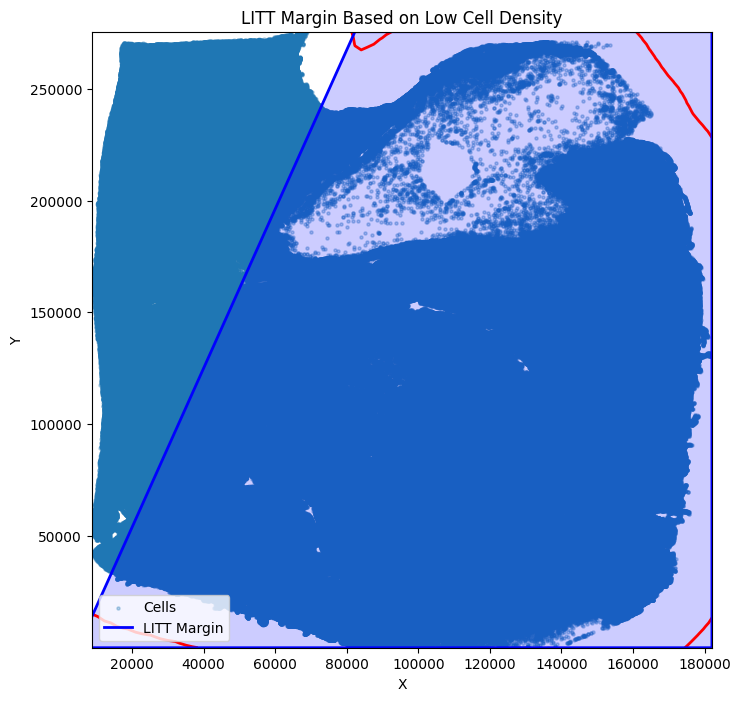

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.spatial import ConvexHull

# Load data (your code)
hem_path = '/Volumes/Siren/Brain_Analyses/Pouya_is_LITT/N235_S12_Large_SOX2/Cell-Centroids-Negative.csv'
cell_path = '/Volumes/Siren/Brain_Analyses/Pouya_is_LITT/N235_S12_Large_SOX2/Cell-Centroids-Positive.csv'

hem_cells = np.genfromtxt(hem_path, delimiter=',', skip_header=1, dtype=[('CellID', 'int32'), ('X', 'float32'), ('Y', 'float32')])
dab_cells = np.genfromtxt(cell_path, delimiter=',', skip_header=1, dtype=[('CellID', 'int32'), ('X', 'float32'), ('Y', 'float32')])

# Combine centroids
all_x = np.concatenate([hem_cells['X'], dab_cells['X']])
all_y = np.concatenate([hem_cells['Y'], dab_cells['Y']])

# Estimate density with KDE
xy = np.vstack([all_x, all_y])
kde = gaussian_kde(xy)
xmin, xmax = all_x.min(), all_x.max()
ymin, ymax = all_y.min(), all_y.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
density = kde(positions).reshape(X.shape)

# Find low-density regions (threshold, e.g., below 5th percentile)
threshold = np.percentile(density, 2)
low_density = density < threshold

# Extract margin: get coordinates of low-density points
margin_points = np.column_stack([X[low_density], Y[low_density]])

# Use convex hull for margin polygon (or use alpha shapes for more accurate boundaries)
if len(margin_points) >= 3:
    hull = ConvexHull(margin_points)
    polygon = margin_points[hull.vertices]
else:
    polygon = margin_points

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(all_x, all_y, s=5, alpha=0.3, label='Cells')
plt.contour(X, Y, density, levels=[threshold], colors='red', linewidths=2)
plt.plot(polygon[:, 0], polygon[:, 1], 'b-', linewidth=2, label='LITT Margin')
plt.fill(polygon[:, 0], polygon[:, 1], 'b', alpha=0.2)
plt.legend()
plt.title('LITT Margin Based on Low Cell Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()